In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할
from sklearn.model_selection import train_test_split

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 랜덤포레스트
from sklearn.ensemble import GradientBoostingRegressor

# 파라미터 조정
import optuna

# 평가지표
from sklearn.metrics import mean_squared_error

In [2]:
# 한글 깨짐 방지
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

## 1. 데이터 불러오기
- df_preprocessed : 인코딩까지 처리된 데이터

In [3]:
df_preprocessed= pd.read_csv("df_preprocessed1.csv", encoding = 'euc-kr')
df_preprocessed

,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2682.68,2010,72000,1,1,4,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,0,1,0
1,19162.00,2015,41000,3,1,4,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,0,1
2,6898.32,2011,46000,2,1,4,18.20,1199.0,88.70,5.0,...,0,1,0,0,0,0,0,0,0,0
3,9197.76,2012,87000,3,1,4,20.77,1248.0,88.76,7.0,...,0,1,0,0,0,0,0,0,0,0
4,27194.71,2013,40670,3,2,3,15.20,1968.0,140.80,5.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,10822.70,2016,41413,3,1,4,27.28,1047.0,69.00,5.0,...,0,0,0,0,0,0,0,0,0,1
6149,13474.72,2017,39015,2,1,4,17.00,1497.0,121.36,5.0,...,0,0,0,0,0,0,1,0,0,0
6150,27838.55,2018,6000,2,1,4,16.00,1368.0,160.00,5.0,...,0,0,0,0,0,0,0,0,1,0
6151,16203.39,2017,21380,3,1,4,24.30,1248.0,88.50,5.0,...,0,0,0,0,0,0,1,0,0,0


## 2. 데이터 분할 및 scale 변환

In [4]:
df_x = df_preprocessed.drop(columns = "Price")
df_y = df_preprocessed['Price']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                                 test_size = 0.3,
                                                                 random_state = 500)

In [5]:
df_train_x.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Name_Ambassador,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
2477,2017,20149,3,2,4,19.27,2143.0,167.62,5.0,0,...,1,0,0,0,0,0,0,0,0,0
554,2013,12100,2,2,4,9.90,1984.0,207.80,2.0,0,...,0,0,0,1,0,0,0,0,0,0
3477,2015,54339,3,1,3,22.54,1396.0,88.73,5.0,0,...,0,0,0,0,0,0,0,0,0,1
5135,2016,71156,3,1,4,26.59,1248.0,74.00,5.0,0,...,0,1,0,0,0,0,0,0,0,0
417,2018,40322,2,1,4,18.90,1197.0,81.86,5.0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
y_train = df_train_y
y_test = df_test_y

In [7]:
scaler = StandardScaler()
X_train_scaled1 = pd.DataFrame(scaler.fit_transform(df_train_x), columns = df_train_x.columns)
X_test_scaled1 = pd.DataFrame(scaler.transform(df_test_x), columns = df_test_x.columns)

In [8]:
scaler = MinMaxScaler()
X_train_scaled2 = pd.DataFrame(scaler.fit_transform(df_train_x), columns = df_train_x.columns)
X_test_scaled2 = pd.DataFrame(scaler.transform(df_test_x), columns = df_test_x.columns)

In [9]:
scaler = RobustScaler()
X_train_scaled3 = pd.DataFrame(scaler.fit_transform(df_train_x), columns = df_train_x.columns)
X_test_scaled3 = pd.DataFrame(scaler.transform(df_test_x), columns = df_test_x.columns)

## 3. 모델 생성

### 3.1 기본 모델
- Training 데이터에 과적함 -> 파라미터 조정 필요

In [10]:
gb_model = GradientBoostingRegressor(random_state=500)
gb_model.fit(X_train_scaled1, y_train)
print("Score on Training set : {:.3f}".format(gb_model.score(X_train_scaled1, y_train )))
print("Score on Test set : {:.3f}".format(gb_model.score(X_test_scaled1, y_test )))

Score on Training set : 0.924
Score on Test set : 0.839


In [11]:
gb_model = GradientBoostingRegressor(random_state=500)
gb_model.fit(X_train_scaled2, y_train)
print("Score on Training set : {:.3f}".format(gb_model.score(X_train_scaled2, y_train )))
print("Score on Test set : {:.3f}".format(gb_model.score(X_test_scaled2, y_test )))

Score on Training set : 0.924
Score on Test set : 0.839


In [12]:
gb_model = GradientBoostingRegressor(random_state=500)
gb_model.fit(X_train_scaled3, y_train)
print("Score on Training set : {:.3f}".format(gb_model.score(X_train_scaled3, y_train )))
print("Score on Test set : {:.3f}".format(gb_model.score(X_test_scaled3, y_test )))

Score on Training set : 0.924
Score on Test set : 0.839


## 4. 모델 파라미터 조정

### 4.1 직접 파라미터 조정

##### ㅡn_estimators
: n_estimators(트리 수)가 증가할수록, TrainScore, TestScore가 꾸준히 증가하는 것을 확인할 수 있다. 이에 따라 Training 셋에 대한 과적합을 피하고 파라미터값을 80으로 조정하기로 하였다.

In [13]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 20)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 500)
    gb.fit(X_train_scaled2, y_train)
    train_score.append(gb.score(X_train_scaled2, y_train))
    test_score.append(gb.score(X_test_scaled2, y_test))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.692,0.679
1,20,0.827,0.797
2,30,0.871,0.822
3,40,0.891,0.826
4,50,0.900,0.827
5,60,0.906,0.830
6,70,0.912,0.833
7,80,0.917,0.837
8,90,0.920,0.837
9,100,0.924,0.839


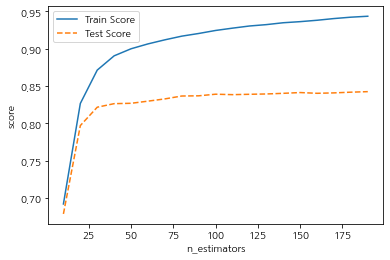

In [14]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

##### ㅡ learning rate
: TrainScore, TestScore 확인 결과, learning_rate가 0.2일 때 모델의 성능이 가장 우수한 것을 확인할 수 있다. 이에 따라 learning_rate는 0.2로 결정하였다.

In [15]:
train_score = []; test_score = []
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(learning_rate = v_learning_rate, n_estimators = 80, random_state = 500)
    gb.fit(X_train_scaled2, y_train)
    train_score.append(gb.score(X_train_scaled2, y_train))
    test_score.append(gb.score(X_test_scaled2, y_test))

df_score_depth = pd.DataFrame()
df_score_depth["learning_rate"] = para_lr
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,learning_rate,TrainScore,TestScore
0,0.1,0.917,0.837
1,0.2,0.943,0.848
2,0.3,0.953,0.844
3,0.4,0.959,0.839
4,0.5,0.963,0.836
5,0.6,0.967,0.833
6,0.7,0.972,0.820
7,0.8,0.971,0.835
8,0.9,0.970,0.780


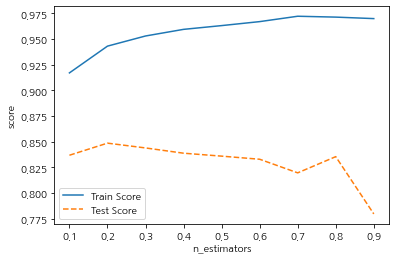

In [16]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

##### ㅡ Max_depth  
: Depth의 파라미터 값이 증가할수록 Train Score는 증가하고 TestScore는 감소하는 경향을 볼 수 있다.
이러한 현상은 모델이 Training 셋에 대하여 과적합하고 있다는 것을 나타내며, TestScore가 가장 높은 점수를 나온 Depth일 때 선택해주는 것이 좋다. 따라서 Max Depth는 3으로 결정했다,

In [17]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=500, n_estimators = 80, learning_rate = 0.2,  max_depth = v_max_depth)
    gb.fit(X_train_scaled2, y_train)
    train_score.append(gb.score(X_train_scaled2, y_train))
    test_score.append(gb.score(X_test_scaled2, y_test))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.782,0.780
1,2,0.905,0.828
2,3,0.943,0.848
3,4,0.962,0.848
4,5,0.981,0.851
5,6,0.990,0.827
6,7,0.996,0.844
7,8,0.998,0.847
8,9,0.999,0.845
9,10,1.000,0.840


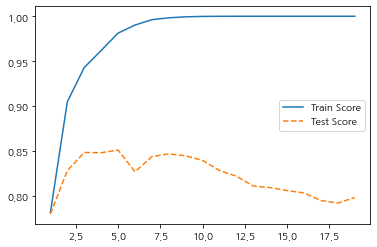

In [18]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

##### ㅡ Min_samples_leaf  
: Min_samples_leaf의 파라미터 값이 증감과 관계없이 TrainScore, Testscore 값이 일정하게 나타남을 확인할 수 있다. 이에 따라 Min_Samples_leaf가 모델에 성능에 영향을 미치지 않고 있다고 판단하여, 더 일반적인 모델의 성능을 위해 충분히 큰 5개로 Min_Samples_leaf의 수를 정하였다.

In [19]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=500, n_estimators = 80, learning_rate = 0.2,  max_depth = 3)
    gb.fit(X_train_scaled2, y_train)
    train_score.append(gb.score(X_train_scaled2, y_train))
    test_score.append(gb.score(X_test_scaled2, y_test))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.943,0.848
1,2,0.943,0.848
2,3,0.943,0.848
3,4,0.943,0.848
4,5,0.943,0.848
5,6,0.943,0.848
6,7,0.943,0.848
7,8,0.943,0.848
8,9,0.943,0.848
9,10,0.943,0.848


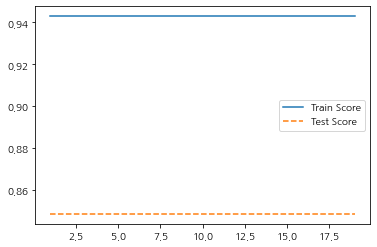

In [20]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

##### ㅡ Min_samples_split
: Min_samples_split이 30일 때, TestScore의 성능이 가장 좋게 나타났다. 이에 따라 min_samples_split을 30으로 결정하였다.

In [21]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=500, n_estimators = 80, learning_rate = 0.2,  max_depth = 3,
                               min_samples_leaf=5, min_samples_split=v_min_samples_split )
    gb.fit(X_train_scaled2, y_train)
    train_score.append(gb.score(X_train_scaled2, y_train))
    test_score.append(gb.score(X_test_scaled2, y_test))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.936,0.853
1,6,0.936,0.853
2,8,0.936,0.853
3,10,0.936,0.853
4,12,0.937,0.856
5,14,0.935,0.854
6,16,0.935,0.855
7,18,0.936,0.855
8,20,0.936,0.853
9,22,0.933,0.858


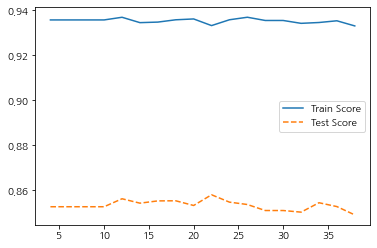

In [22]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

## 5. 최종 모델 결정

In [23]:
gb_model = GradientBoostingRegressor(random_state=500, n_estimators = 80, learning_rate = 0.2,  max_depth = 3,
                               min_samples_leaf=5, min_samples_split=22)
gb_model.fit(X_train_scaled2, y_train)
print("Score on Training set : {:.3f}".format(gb_model.score(X_train_scaled2, y_train )))
print("Score on Test set : {:.3f}".format(gb_model.score(X_test_scaled2, y_test )))

Score on Training set : 0.933
Score on Test set : 0.858


### 5.1 feature importance
- Power가 트리를 생성하는 가장 중요한 변수임이 나타났음
- Power > Year > Kilometers_Driven > Engine > Transmission > Mileage 순으로 중요도가 높게 나타남

In [24]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_train_scaled2.columns
df_importance["Importance"] = gb_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,Power,0.679
0,Year,0.175
1,Kilometers_Driven,0.028
6,Engine,0.028
23,Name_Land,0.015
3,Transmission,0.014
26,Name_Mercedes-Benz,0.012
5,Mileage,0.012
2,Fuel_Type,0.008
27,Name_Mini,0.006


Text(0, 0.5, '변수')

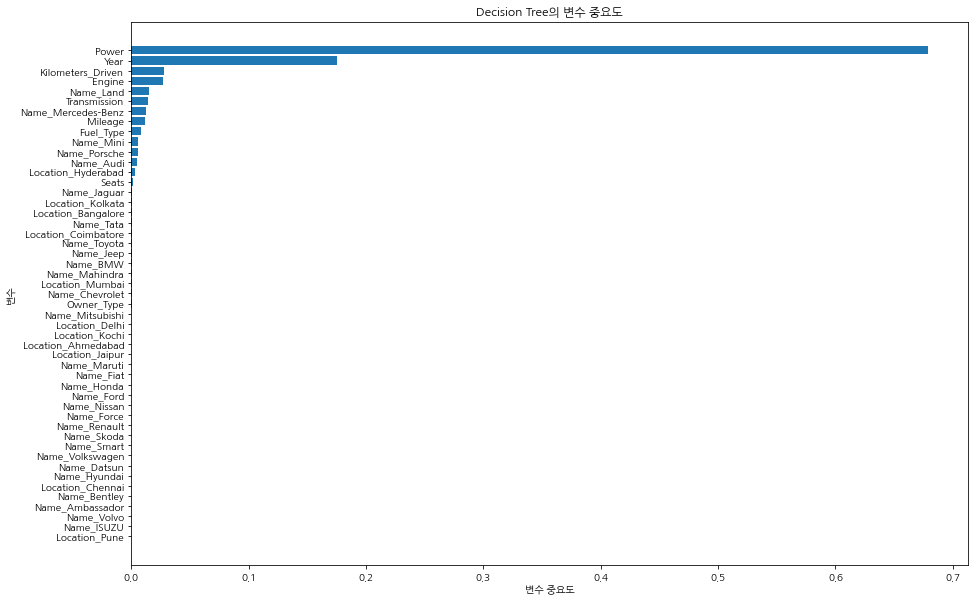

In [25]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize=(15,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.title('Decision Tree의 변수 중요도')
plt.xlabel("변수 중요도")
plt.ylabel("변수")